In [5]:
import json
import plotly.graph_objects as go

def get_data(filepath1):
    # Load data from .txt file
    with open(filepath1, 'r') as file:
        data = [json.loads(line) for line in file][:-1]
        
    # Parsing the data
    epoch = [d['epoch'] for d in data]
    train_loss = [d['train_loss'] for d in data]
    val_loss = [d['val_loss'] for d in data]
    val_acc1 = [d['val_acc1'] for d in data]
    
    return epoch, train_loss, val_loss, val_acc1


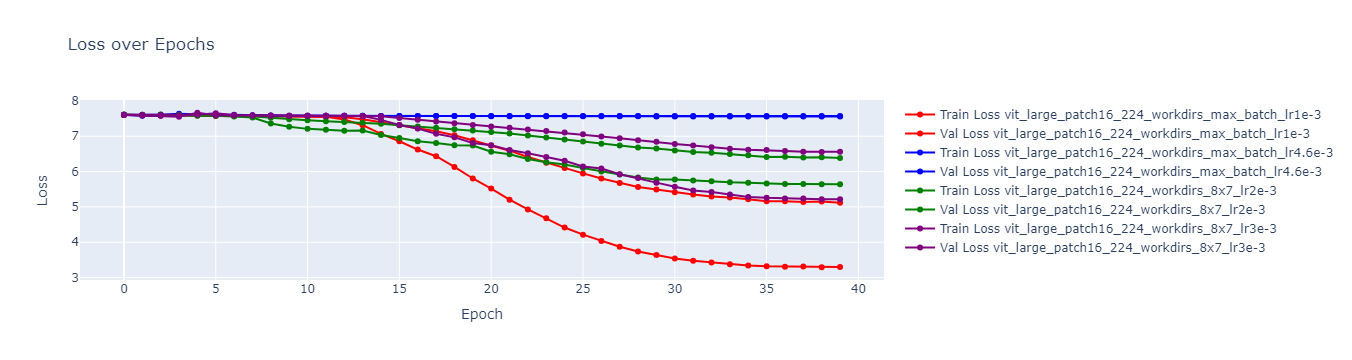

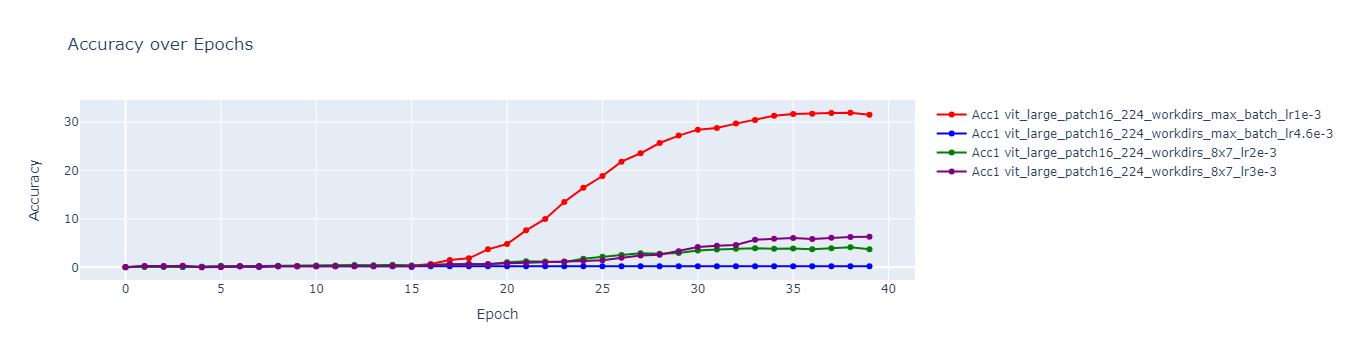

In [6]:
log_list = [
    '/home/jovyan/tulenkov/slt_mae/workdirs/vit_large_patch16_224_workdirs_max_batch_lr1e-3/log.txt',
    '/home/jovyan/tulenkov/slt_mae/workdirs/vit_large_patch16_224_workdirs_max_batch_lr4.6e-3/log.txt',
    '/home/jovyan/tulenkov/slt_mae/workdirs/vit_large_patch16_224_workdirs_8x7_lr2e-3/log.txt',
    '/home/jovyan/tulenkov/slt_mae/workdirs/vit_large_patch16_224_workdirs_8x7_lr3e-3/log.txt'
]
color_list = [
    'red',
    'blue',
    'green',
    'purple'
]
fig1 = go.Figure()
fig2 = go.Figure()

for log, color in zip(log_list, color_list):
    epoch, train_loss, val_loss, val_acc1 = get_data(log)
    sign = log.split('/')[-2]
    # Plotting Loss
    fig1.add_trace(go.Scatter(x=epoch, y=train_loss, mode='lines+markers', name=f'Train Loss {sign}', marker=dict(color=color), line=dict(color=color)))
    fig1.add_trace(go.Scatter(x=epoch, y=val_loss, mode='lines+markers', name=f'Val Loss {sign}', marker=dict(color=color), line=dict(color=color)))
    fig1.update_layout(title='Loss over Epochs', xaxis_title='Epoch', yaxis_title='Loss')
    
    # Plotting Accuracy
    fig2.add_trace(go.Scatter(x=epoch, y=val_acc1, mode='lines+markers', name=f"Acc1 {sign}", marker=dict(color=color), line=dict(color=color)))
    fig2.update_layout(title='Accuracy over Epochs', xaxis_title='Epoch', yaxis_title='Accuracy')
fig1.show()
fig2.show()